In [1]:
import pandas as pd, numpy as np, os, sys
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from matplotlib.dates import DateFormatter

############################################################################
#####   Backend   ##########################################################
############################################################################


#####   Data processing functions   ########################################

def dataset_process_basic():
	"""
	Dataproc step1: Import and clean the data
	"""
	try:
		currDir = os.path.dirname(__file__)
		df = pd.read_csv(f'{currDir}/Finance_ver2.tsv', sep='\t')
	except NameError:
		df = pd.read_csv('Finance_ver2.tsv', sep='\t')
	dfHeader = df[df['Date'] == '#'].copy()
	dfMain   = df[df['Date'] != '#'].copy()
	dfMain['Date'] = pd.to_datetime(dfMain['Date'], format='%d.%m.%Y')
	# Reset index to compensate for not including Header rows (ones with '#'):
	dfMain.reset_index(inplace=True) 
	return dfHeader, dfMain

def convert(df, finalCurrency):
	"""
	Dataproc step2: Convert the currency into desired currency 
	\nprocFunction to convert your spendings 
	(written in different currencies)
	into whatever one currency you want. 
	E.g. RUB, MXN
	"""
	newColName = f'Converted_{finalCurrency}'
	df[newColName] = 0
	exchangeRate = {'RUB-MXN': 0.25, 'MXN-RUB': 4}
	for iter, i in enumerate(df['Currency']):
		if i == finalCurrency:
			# print( dfMain['Amount'].iloc[iter] )
			df[newColName].loc[iter] = df['Amount'].iloc[iter]
		else:
			a = i + '-' + finalCurrency
			df[newColName].loc[iter] = df['Amount'].iloc[iter] * exchangeRate[a]
	return df

def add_extra_dates(dfMain):
	"""
	Dataproc step3 (optional): add extra datetime formats to the dataset
	"""
	dfMain['DDMM']   = dfMain['Date'].dt.strftime('%d.%m')
	dfMain['DDMMYY'] = dfMain['Date'].dt.strftime('%d.%m.%y')
	dfMain['YYYY']   = dfMain['Date'].dt.strftime('%Y')
	dfMain['MMYY']   = dfMain['Date'].dt.strftime('%m.%y')
	return dfMain


# Print unique counts of spending categories

In [3]:
def function1():
	"""
	Print unique counts of spending categories
	"""
	dfHeader, df2 = dataset_process_basic()
	array = df2['Category'].unique()
	textOutput = ''
	textOutput += f"Spending categories:\n"
	c=1; 
	for i in array: textOutput += f"  {c}) {i}\n"; c+=1
	return textOutput

output = function1()
print(output)

Spending categories:
  1) groceries
  2) transportation
  3) bills
  4) personal Evgenii
  5) personal Carolina
  6) eat out
  7) household items
  8) documents
  9) clothes
  10) medicine and hygiene



# Print totals per month (all-time)

C:\Users\evgen\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


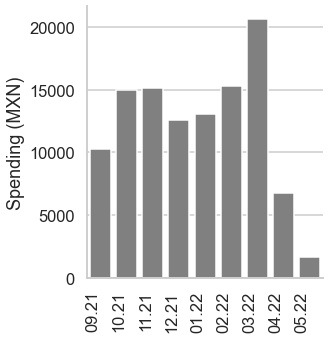

In [22]:
def plot2():
	"""
	Print totals per month (all-time)
	"""
	dfHeader, dfMain = dataset_process_basic()
	currency = 'MXN'; 
	dfMain = convert(dfMain, currency)
	dfMain2 = dfMain.groupby('Date')[f'Converted_{currency}'].sum().to_frame().reset_index()
	dfMain2 = add_extra_dates(dfMain2)
	# Graph
	graph = sns.catplot(x='MMYY', y=f'Converted_{currency}', data=dfMain2, kind='bar', color='grey')
	graph.set_xticklabels(rotation=90, horizontalalignment='right')
	plt.xlabel(''); plt.ylabel(f'Spending ({currency})')
	sns.set_style('whitegrid')
	sns.set_context('talk')
	plt.show()
plot2()

C:\Users\evgen\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


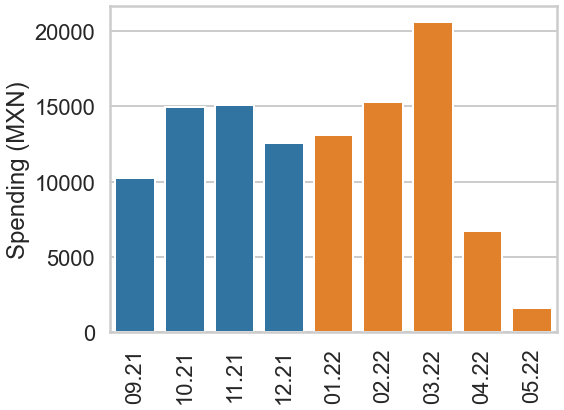

C:\Users\evgen\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


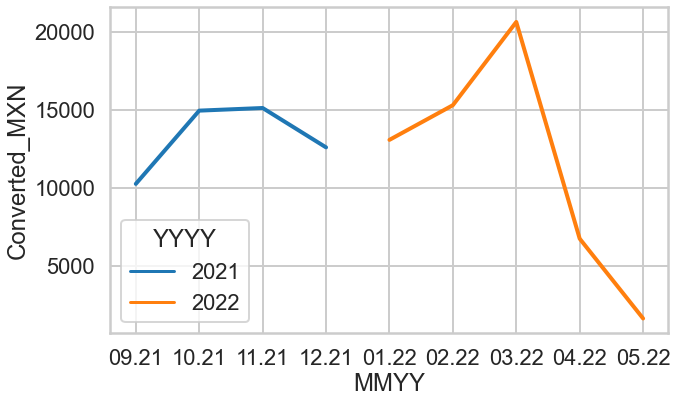

In [31]:

def plot2_ver2():
	dfHeader, dfMain = dataset_process_basic()
	currency = 'MXN'; 
	dfMain = convert(dfMain, currency)
	dfMain2 = dfMain.groupby('Date')[f'Converted_{currency}'].sum().to_frame().reset_index()
	dfMain2 = add_extra_dates(dfMain2)
	# Graph
	plt.figure(figsize=(8, 6))
	graph = sns.barplot(x='MMYY', y=f'Converted_{currency}', data=dfMain2, hue='YYYY', dodge=False)
	# graph.set_xticklabels(rotation=90, horizontalalignment='right')
	plt.xticks(rotation=90)
	plt.xlabel(''); plt.ylabel(f'Spending ({currency})')
	plt.legend([], [], frameon=False)
	sns.set_style('whitegrid')
	sns.set_context('poster')
	plt.show()

def plot2_ver3():
	dfHeader, dfMain = dataset_process_basic()
	currency = 'MXN'; 
	dfMain = convert(dfMain, currency)
	# Add extra time information
	dfMain2 = dfMain.groupby('Date')[f'Converted_{currency}'].sum().to_frame().reset_index()
	dfMain2 = add_extra_dates(dfMain2)
	dfMain2
	plt.figure(figsize=(10, 6))
	sns.lineplot(x='MMYY', y=f'Converted_{currency}', data=dfMain2, linewidth=4, hue='YYYY')



plot2_ver2()
plot2_ver3()

# Total per month (year)

C:\Users\evgen\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\evgen\AppData\Local\Temp/ipykernel_7556/2349100282.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['MM'] = dfMain2['Date'].dt.strftime('%b')


,Date,Converted_MXN,DDMM,DDMMYY,YYYY,MMYY,MM
0,2021-09-01,10252.75,01.09,01.09.21,2021,09.21,Sep
1,2021-10-01,14938.75,01.10,01.10.21,2021,10.21,Oct
2,2021-11-01,15107.50,01.11,01.11.21,2021,11.21,Nov
3,2021-12-01,12588.75,01.12,01.12.21,2021,12.21,Dec


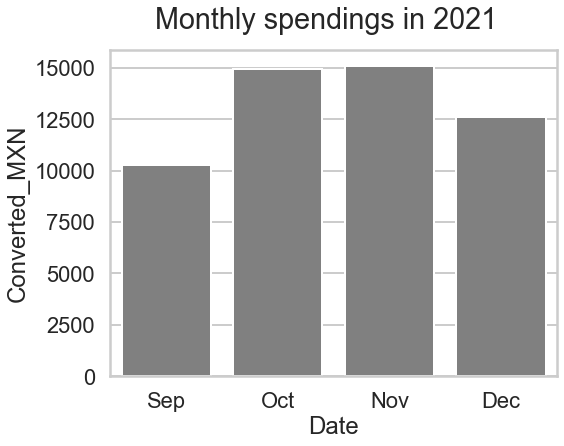

In [34]:
import datetime

def plot3(year):
	dfHeader, dfMain = dataset_process_basic()
	currency = 'MXN'; 
	dfMain = convert(dfMain, currency)
	# Add extra time information
	dfMain2 = dfMain.groupby('Date')[f'Converted_{currency}'].sum().to_frame().reset_index()
	dfMain2 = add_extra_dates(dfMain2)
	dfMain2
	df3 = dfMain2[dfMain2['YYYY'] == year]
	df3['MM'] = dfMain2['Date'].dt.strftime('%b')
	# df3 = df2[ (df2['Date'] < endDate) & (df2['Date'] > startDate) ]
	# Check that between the two dates the distance is less than 6 months
	# startDateDT = datetime.datetime(int(startDate.split('-')[0]), int(startDate.split('-')[1]), int(startDate.split('-')[2]))
	# endDateDT = datetime.datetime(int(endDate.split('-')[0]), int(endDate.split('-')[1]), int(endDate.split('-')[2]))
	# delta = endDateDT - startDateDT
	# deltaDays = (delta.total_seconds() /(3600*24))
	# assert deltaDays < 181, 'the number is higher than 6 months!'
	# Plot the figure
	plt.figure(figsize=(8, 6))
	sns.barplot(x='MM', y=f'Converted_{currency}', data=df3, color='grey')
	plt.xlabel('Date')
	plt.legend([], [], frameon=False)
	plt.suptitle(f'Monthly spendings in {year}')
	sns.set_context('poster')

	return df3

plot3('2021')


# Total per month (range)

C:\Users\evgen\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


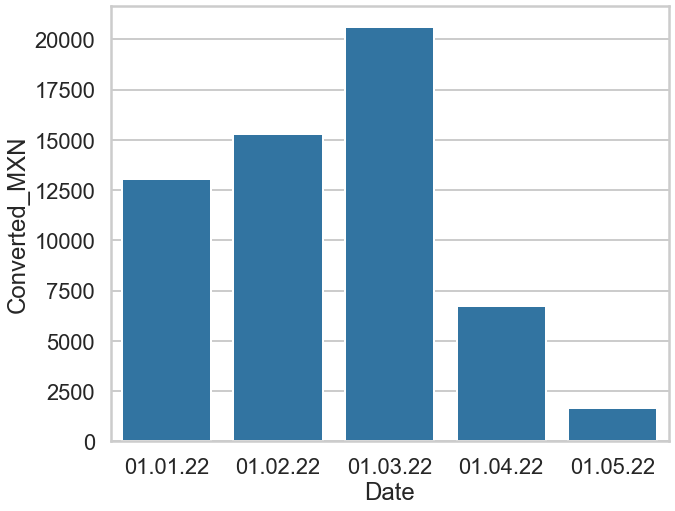

,Date,Converted_MXN,DDMM,DDMMYY,YYYY,MMYY
4,2022-01-01,13068.75,01.01,01.01.22,2022,01.22
5,2022-02-01,15286.50,01.02,01.02.22,2022,02.22
6,2022-03-01,20611.00,01.03,01.03.22,2022,03.22
7,2022-04-01,6749.00,01.04,01.04.22,2022,04.22
8,2022-05-01,1643.00,01.05,01.05.22,2022,05.22


In [37]:
# Ver 2.3
# Plot in the range of months

import datetime

def plot4(startDate, endDate):
	dfHeader, dfMain = dataset_process_basic()
	currency = 'MXN'; 
	dfMain = convert(dfMain, currency)
	# Add extra time information
	dfMain2 = dfMain.groupby('Date')[f'Converted_{currency}'].sum().to_frame().reset_index()
	dfMain2 = add_extra_dates(dfMain2)
	dfMain2
	df3 = dfMain2[ (dfMain2['Date'] <= endDate) & (dfMain2['Date'] >= startDate) ]
	# Check that between the two dates the distance is less than 6 months
	startDateDT = datetime.datetime(int(startDate.split('-')[0]), int(startDate.split('-')[1]), int(startDate.split('-')[2]))
	endDateDT = datetime.datetime(int(endDate.split('-')[0]), int(endDate.split('-')[1]), int(endDate.split('-')[2]))
	delta = endDateDT - startDateDT
	deltaDays = (delta.total_seconds() /(3600*24))
	assert deltaDays < 181, 'the number is higher than 6 months!'
	# Plot the figure
	plt.figure(figsize=(10, 8))
	sns.barplot(x='DDMMYY', y=f'Converted_{currency}', data=df3, hue='YYYY', dodge=False)
	plt.xlabel('Date')
	plt.legend([], [], frameon=False)
	plt.show()
	return df3

plot4('2022-01-01', '2022-05-29')


# In month per category

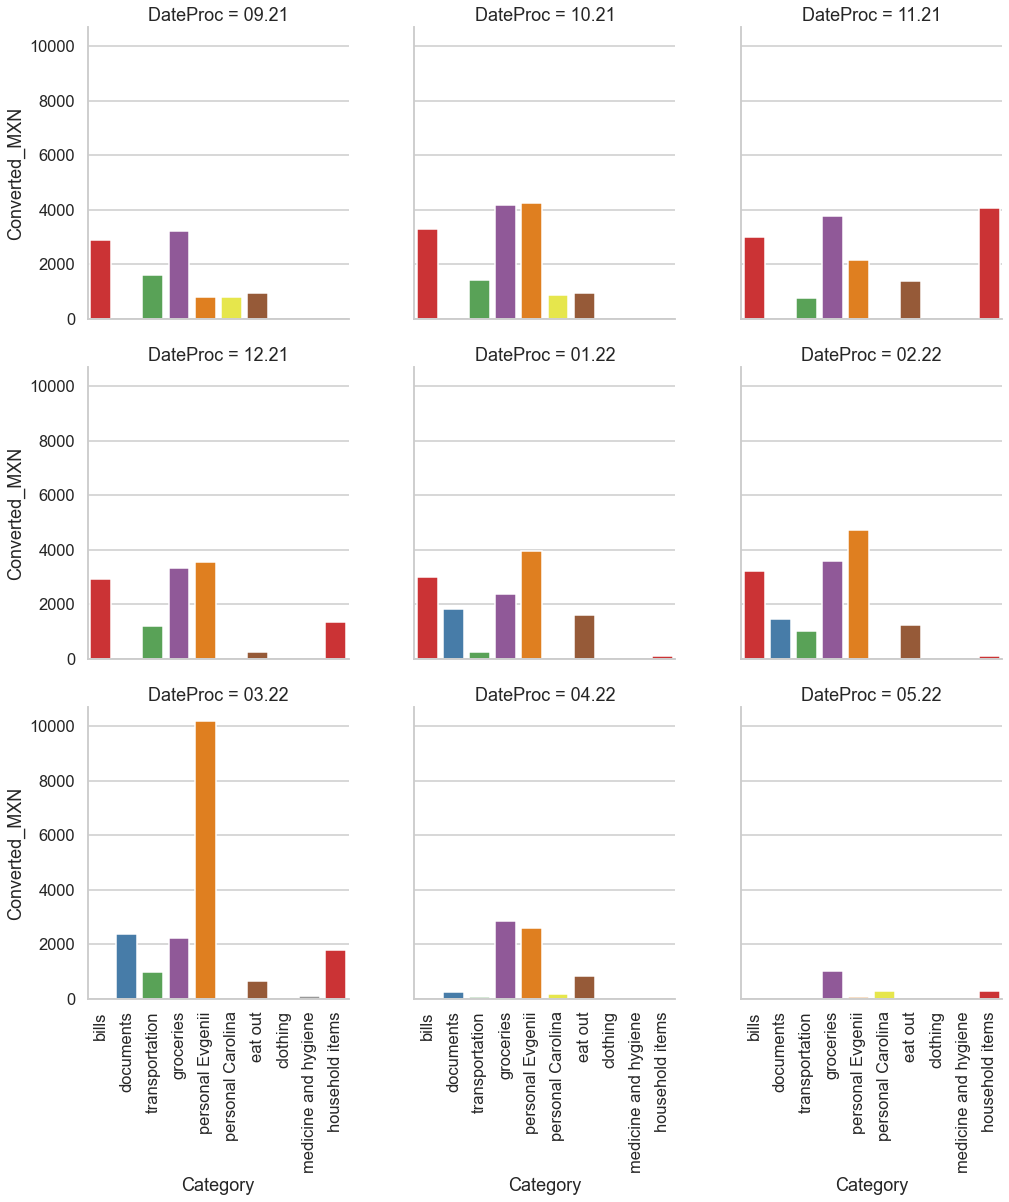

In [46]:
def month_per_cat():
	# df = pd.read_csv('Finance.tsv', sep='\t', parse_dates=['Date'], skiprows=1)
	# df
	# Plot grouped bar plot
	dfHeader, dfMain = dataset_process_basic()
	currency = 'MXN'; 
	dfMain = convert(dfMain, currency)
	# Add extra time information
	df2 = dfMain.groupby(['Date', 'Category'])[f'Converted_{currency}'].sum().to_frame().reset_index()
	df2['DateProc'] = df2['Date'].dt.strftime('%m.%y')
	df2
	graph = sns.catplot(
		x='Category', y=f'Converted_{currency}', col='DateProc', data=df2, kind='bar', col_wrap=3,
		palette='Set1',
		order=['bills', 'documents', 'transportation', 'groceries', 'personal Evgenii', 'personal Carolina', 'eat out', 'clothing', 'medicine and hygiene', 'household items'])
	graph.set_xticklabels(rotation=90, horizontalalignment='center')
	sns.set_style('whitegrid')
	sns.set_context('talk')

month_per_cat()